In [1]:
# Import Files
import os
import sys
import time
import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Reading the data
data = pd.read_excel("result.xlsx")

In [3]:
data.columns

Index(['Name', 'S1i', 'S1ex', 'S1t', 'S2i', 'S2ex', 'S2t', 'S3i', 'S3ex',
       'S3t', 'S4i', 'S4ex', 'S4t', 'S5i', 'S5ex', 'S5t', 'S6i', 'S6ex', 'S6t',
       'S7i', 'S7ex', 'S7t', 'S8i', 'S8ex', 'S8t', 'S9i', 'S9ex', 'S9t',
       'S10i', 'S10ex', 'S10t', 'S11i', 'S11ex', 'S11t', 'S12i', 'S12ex',
       'S12t'],
      dtype='object')

In [4]:
data.head()

,Name,S1i,S1ex,S1t,S2i,S2ex,S2t,S3i,S3ex,S3t,...,S9t,S10i,S10ex,S10t,S11i,S11ex,S11t,S12i,S12ex,S12t
0,Abhishek aggarwal,15,20,40,18,47,65,21,53,74,...,66,30,47,77,29,52,81,26,39,65
1,Abhishek kumar,18,30,48,20,56,76,22,57,79,...,66,32,50,82,30,50,80,32,48,80
2,Abhishek mittal,24,66,90,22,65,87,25,61,86,...,79,38,51,89,34,50,84,38,57,95
3,Abhishek singh,10,17,27,19,51,70,21,53,74,...,81,16,42,58,28,40,68,10,40,50
4,Aditya goel,16,28,44,21,55,76,18,57,75,...,72,37,45,82,30,50,80,32,48,80


In [5]:
outputs = []
inp = pd.DataFrame()
for i in range(len(data)):
    r = True
    for j in range(len(data.columns)):
        if('ex' in data.columns[j]):
            if (data[data.columns[j]][i]) < 35:
                r = False
                break
        elif('t' in data.columns[j]):
            if (data[data.columns[j]][i]) < 50:
                r = False
                break
    outputs.append(r)

In [6]:
for item in data.columns:
    if 'i' in item:
        inp[item] = data[item]

In [7]:
inp.columns

Index(['S1i', 'S2i', 'S3i', 'S4i', 'S5i', 'S6i', 'S7i', 'S8i', 'S9i', 'S10i',
       'S11i', 'S12i'],
      dtype='object')

In [8]:
inp['category'] = outputs

In [9]:
inp.to_csv("test.csv", index=False)

In [10]:
inp = pd.read_csv("test.csv")

## Preparing the data for training and testing

In [11]:
# Shuffle function
from sklearn.utils import shuffle
inp = shuffle(inp)

In [13]:
# split into train and test sets
train_size = int(len(inp) * 0.74)
test_size = len(inp) - train_size
train, test = inp.iloc[0:train_size], inp.iloc[train_size:len(inp),:]
print(len(train), len(test))

158 56


In [14]:
train.columns

Index(['S1i', 'S2i', 'S3i', 'S4i', 'S5i', 'S6i', 'S7i', 'S8i', 'S9i', 'S10i',
       'S11i', 'S12i', 'category'],
      dtype='object')

In [15]:
test.columns

Index(['S1i', 'S2i', 'S3i', 'S4i', 'S5i', 'S6i', 'S7i', 'S8i', 'S9i', 'S10i',
       'S11i', 'S12i', 'category'],
      dtype='object')

### SVM Classifier

In [16]:
from sklearn.svm import SVC

In [17]:
reg = SVC(kernel='linear')

In [18]:
np.unique(train['category'])

array([False,  True])

In [19]:
reg.fit(train[['S1i', 'S2i', 'S3i', 'S4i', 'S5i', 'S6i', 'S7i', 'S8i', 'S9i', 'S10i', 'S11i', 'S12i']], train[['category']])

C:\Users\nisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
# Make predictions using the testing set
reg_y_pred = reg.predict(test[['S1i', 'S2i', 'S3i', 'S4i', 'S5i', 'S6i', 'S7i', 'S8i', 'S9i', 'S10i', 'S11i', 'S12i']])
# Accuracy
print(accuracy_score(test['category'], reg_y_pred))

0.875


In [22]:
plot_array = []
graph_index = []
for i in range(len(reg_y_pred)):
    if(reg_y_pred[i]):
        plot_array.append(1)
    else:
        plot_array.append(0.5)
    graph_index.append(i)

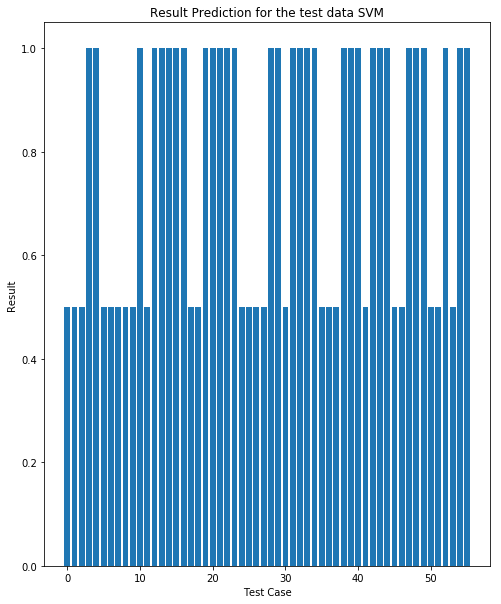

In [23]:
plt.figure(figsize=(8,10))
plt.bar(graph_index, plot_array)
plt.ylabel('Result')
plt.xlabel('Test Case')
plt.title('Result Prediction for the test data SVM')
plt.show()

### Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
reg = GaussianNB()

In [26]:
np.unique(train['category'])

array([False,  True])

In [27]:
reg.fit(train[['S1i', 'S2i', 'S3i', 'S4i', 'S5i', 'S6i', 'S7i', 'S8i', 'S9i', 'S10i', 'S11i', 'S12i']], train[['category']])

C:\Users\nisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
# Make predictions using the testing set
reg_y_pred = reg.predict(test[['S1i', 'S2i', 'S3i', 'S4i', 'S5i', 'S6i', 'S7i', 'S8i', 'S9i', 'S10i', 'S11i', 'S12i']])
# Accuracy
print(accuracy_score(test['category'], reg_y_pred))

0.8571428571428571


In [29]:
plot_array = []
graph_index = []
for i in range(len(reg_y_pred)):
    if(reg_y_pred[i]):
        plot_array.append(1)
    else:
        plot_array.append(0.5)
    graph_index.append(i)

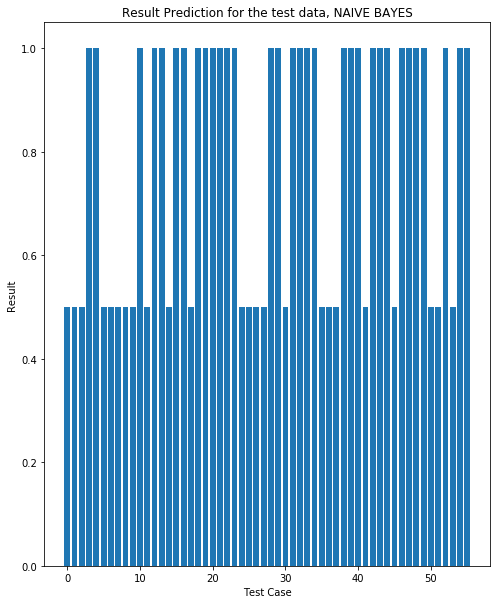

In [30]:
plt.figure(figsize=(8,10))
plt.bar(graph_index, plot_array)
plt.ylabel('Result')
plt.xlabel('Test Case')
plt.title('Result Prediction for the test data, NAIVE BAYES')
plt.show()

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.datasets import make_classification

In [33]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

In [34]:
reg = RandomForestClassifier()

In [35]:
np.unique(train['category'])

array([False,  True])

In [36]:
reg.fit(train[['S1i', 'S2i', 'S3i', 'S4i', 'S5i', 'S6i', 'S7i', 'S8i', 'S9i', 'S10i', 'S11i', 'S12i']], train[['category']])

C:\Users\nisha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
# Make predictions using the testing set
reg_y_pred = reg.predict(test[['S1i', 'S2i', 'S3i', 'S4i', 'S5i', 'S6i', 'S7i', 'S8i', 'S9i', 'S10i', 'S11i', 'S12i']])
# Accuracy
print(accuracy_score(test['category'], reg_y_pred))

0.8392857142857143


In [39]:
print (reg_y_pred)

[ True False  True  True False False False False False False  True False
  True  True  True  True  True False  True  True  True  True  True  True
 False False False False  True False False  True False  True  True False
 False False False  True  True False  True  True  True False False  True
  True  True  True False  True False  True  True]


In [40]:
plot_array = []
graph_index = []
for i in range(len(reg_y_pred)):
    if(reg_y_pred[i]):
        plot_array.append(1)
    else:
        plot_array.append(0.5)
    graph_index.append(i)

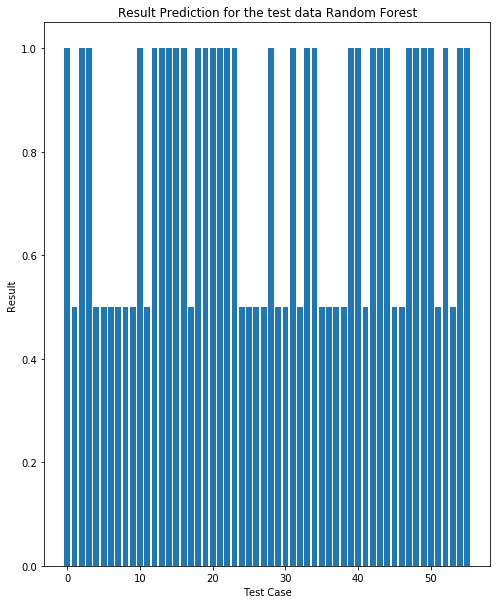

In [41]:
plt.figure(figsize=(8,10))
plt.bar(graph_index, plot_array)
plt.ylabel('Result')
plt.xlabel('Test Case')
plt.title('Result Prediction for the test data Random Forest')
plt.show()